# Predicting Long-Lived Bugs

## 1. Introduction 

This first experiment used a dataset with 7935 bug reports extracted from Eclipse Bugzilla Tracking System. The table below shows the evaluation performance metrics yielded.

In [143]:
import pandas as pd
import numpy as np
bs_results = pd.read_csv('~/Workspace/issue-crawler/rscripts/results/20181104084742-long_live_bug-evaluation.csv')
cv_results = pd.read_csv('~/Workspace/issue-crawler/rscripts/results/20181106091526-long_live_bug-evaluation.csv')
results = pd.concat([bs_results, cv_results], ignore_index=True)

# filling missing data
results['Acc_1'] = results.Acc_1.fillna(0)
results['Balanced_Acc'] = results.Balanced_Acc.fillna(results.Acc_0 / 2)

results.head(10)

,Dataset,Model,Resampling,Threshold,Train_Size,Train_Qt_Class_0,Train_Qt_Class_1,Test_Size,Test_Qt_Class_0,Test_Qt_Class_1,...,Tp,Fp,Tn,Fn,Acc_0,Acc_1,Balanced_Acc,Precision,Recall,Fmeasure
0,Eclipse,knn,bootstrap,4,5804,2511,3293,1933,836,1097,...,271,325,565,772,0.454698,0.422588,0.438643,0.454698,0.259827,0.330689
1,Eclipse,knn,bootstrap,8,5803,3075,2728,1934,1025,909,...,572,466,453,443,0.551060,0.505580,0.528320,0.551060,0.563547,0.557233
2,Eclipse,knn,bootstrap,16,5803,3555,2248,1934,1185,749,...,818,467,367,282,0.636576,0.565485,0.601031,0.636576,0.743636,0.685954
3,Eclipse,knn,bootstrap,32,5804,4085,1719,1933,1361,572,...,1197,502,164,70,0.704532,0.700855,0.702693,0.704532,0.944751,0.807148
4,Eclipse,knn,bootstrap,64,5803,4612,1191,1934,1537,397,...,1497,385,40,12,0.795430,0.769231,0.782331,0.795430,0.992048,0.882925
5,Eclipse,knn,bootstrap,128,5803,5055,748,1934,1685,249,...,1671,247,14,2,0.871220,0.875000,0.873110,0.871220,0.998805,0.930660
6,Eclipse,knn,bootstrap,256,5804,5429,375,1933,1809,124,...,1807,124,2,0,0.935785,1.000000,0.967892,0.935785,1.000000,0.966827
7,Eclipse,knn,bootstrap,512,5804,5697,107,1933,1898,35,...,1898,35,0,0,0.981893,0.000000,0.490947,0.981893,1.000000,0.990864
8,Eclipse,rf,bootstrap,4,5804,2511,3293,1933,836,1097,...,246,209,590,888,0.540659,0.399188,0.469924,0.540659,0.216931,0.309629
9,Eclipse,rf,bootstrap,8,5803,3075,2728,1934,1025,909,...,682,503,343,406,0.575527,0.457944,0.516736,0.575527,0.626838,0.600088


## 2. Analysis of Results

In [142]:
# slicing data
results = results[['Model', 'Resampling', 'Threshold', 'Feature', 'Balanced_Acc']]
results.head(10)

,Model,Resampling,Threshold,Feature,Balanced_Acc
0,knn,bootstrap,4,Description,0.438643
1,knn,bootstrap,8,Description,0.528320
2,knn,bootstrap,16,Description,0.601031
3,knn,bootstrap,32,Description,0.702693
4,knn,bootstrap,64,Description,0.782331
5,knn,bootstrap,128,Description,0.873110
6,knn,bootstrap,256,Description,0.967892
7,knn,bootstrap,512,Description,0.490947
8,rf,bootstrap,4,Description,0.469924
9,rf,bootstrap,8,Description,0.516736


(<Figure size 2000x800 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1295fb828>)

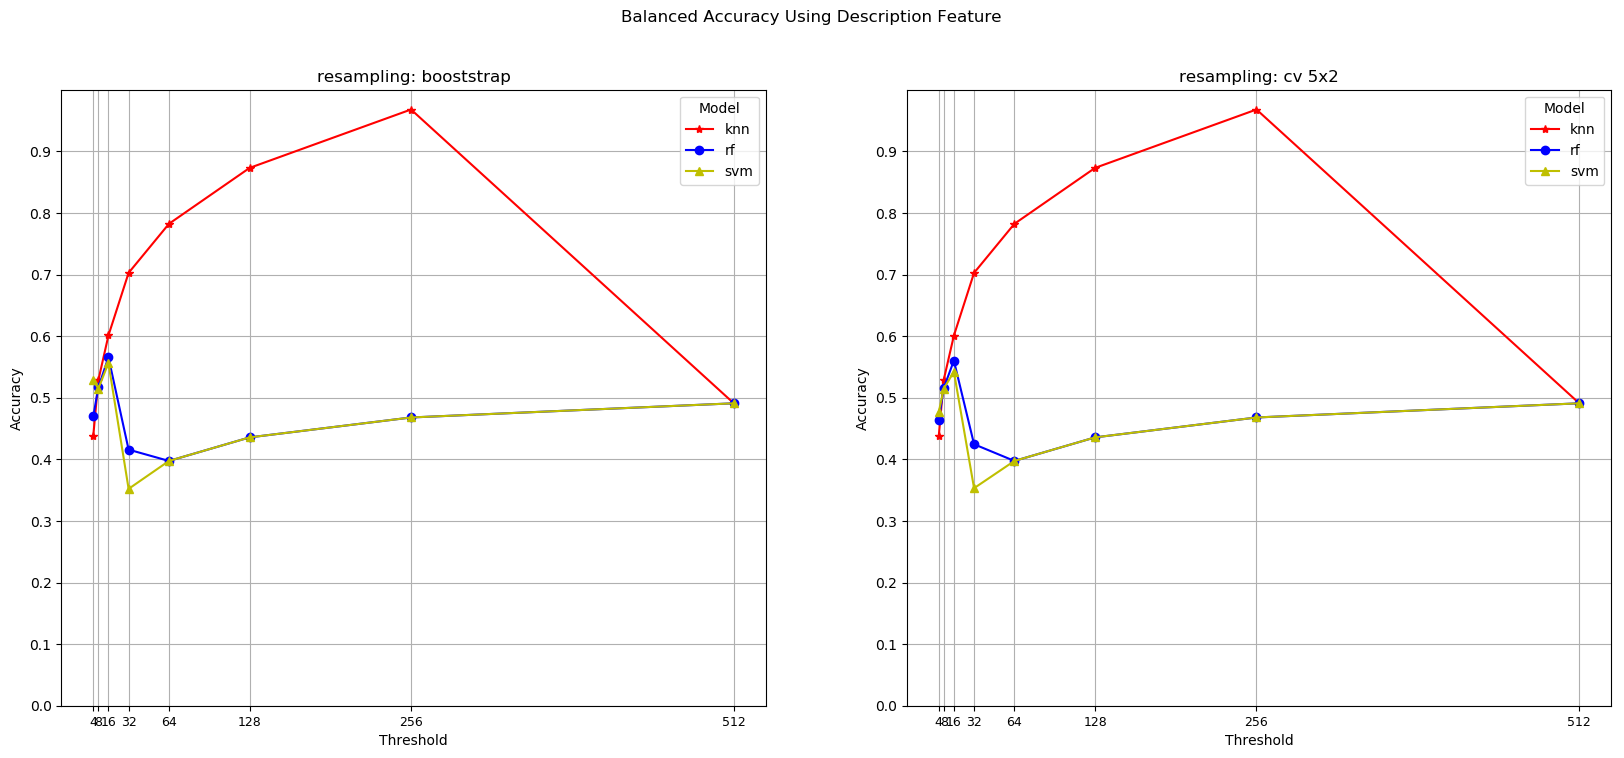

In [137]:
%matplotlib inline
import matplotlib.pyplot as plt
   
def lineplot(data, feature):
    plt.style.use('default')

    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8), sharex=True)
    all_results = data[data['Feature'] == feature]
    
    bs_results  = all_results[all_results['Resampling'] == 'bootstrap']
    bs_results  = bs_results.pivot_table(index=['Threshold'], columns='Model', values='Balanced_Acc')
    
    cv_results  = all_results[all_results['Resampling'] == 'cv 5x2']
    cv_results  = cv_results.pivot_table(index=['Threshold'], columns='Model', values='Balanced_Acc')
    
    
    ax = bs_results.plot(style=['r*-','bo-','y^-']
                        , title = 'resampling: booststrap'
                        , xticks=[4, 8, 16, 32, 64, 128, 256, 512]
                        , yticks=np.arange(0, 1, step=0.1)
                        , grid=True
                        , ax = axes[0]
                        , figsize=(20,8))

    ax.set_ylabel('Accuracy')
    ax.set_ylim(0,1.0)
    ax.set_xticklabels([4, 8, 16, 32, 64, 128, 256, 512], fontsize=9)
    # Setting the figure's main title to the text passed as parameter
    fig.suptitle('Balanced Accuracy Using %s Feature' % feature)

    
    ax = cv_results.plot(style=['r*-','bo-','y^-']
                        , title = 'resampling: cv 5x2'
                        #, xticks=[4, 8, 16, 32, 64, 128, 256, 512]
                        , yticks=np.arange(0, 1, step=0.1)
                        , grid=True
                        , ax = axes[1]
                        , figsize=(20,8))
    
    ax.set_ylabel('Accuracy')
    ax.set_ylim(0,1.0)
    ax.set_xticklabels([4, 8, 16, 32, 64, 128, 256, 512], fontsize=9)
    # Returning this for good practice, might use later
    return fig, ax
    
lineplot(results, 'Description')



(<Figure size 2000x800 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x128f667b8>)

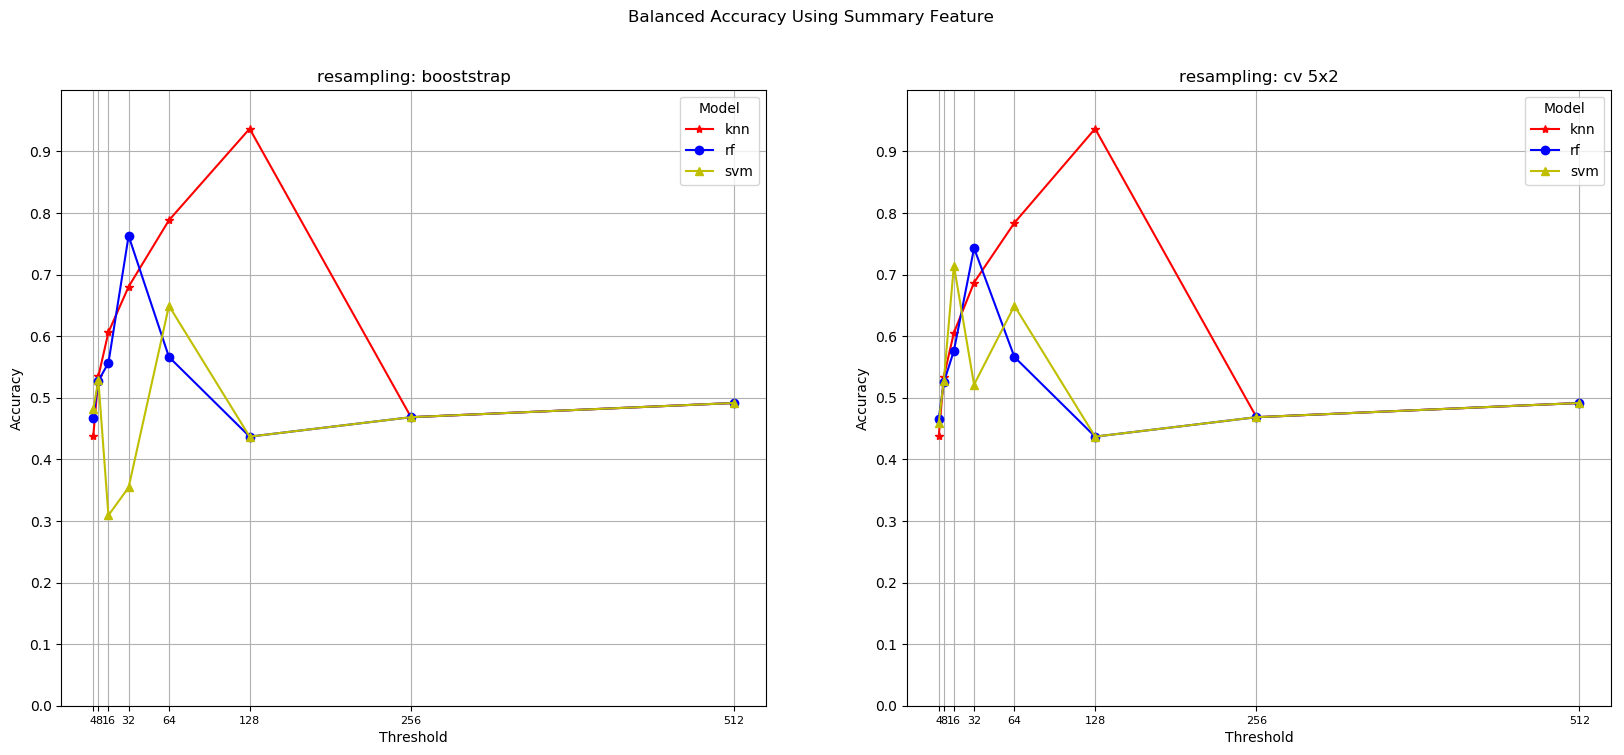

In [135]:
lineplot(results, 'Summary')

(<Figure size 2000x800 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x129504518>)

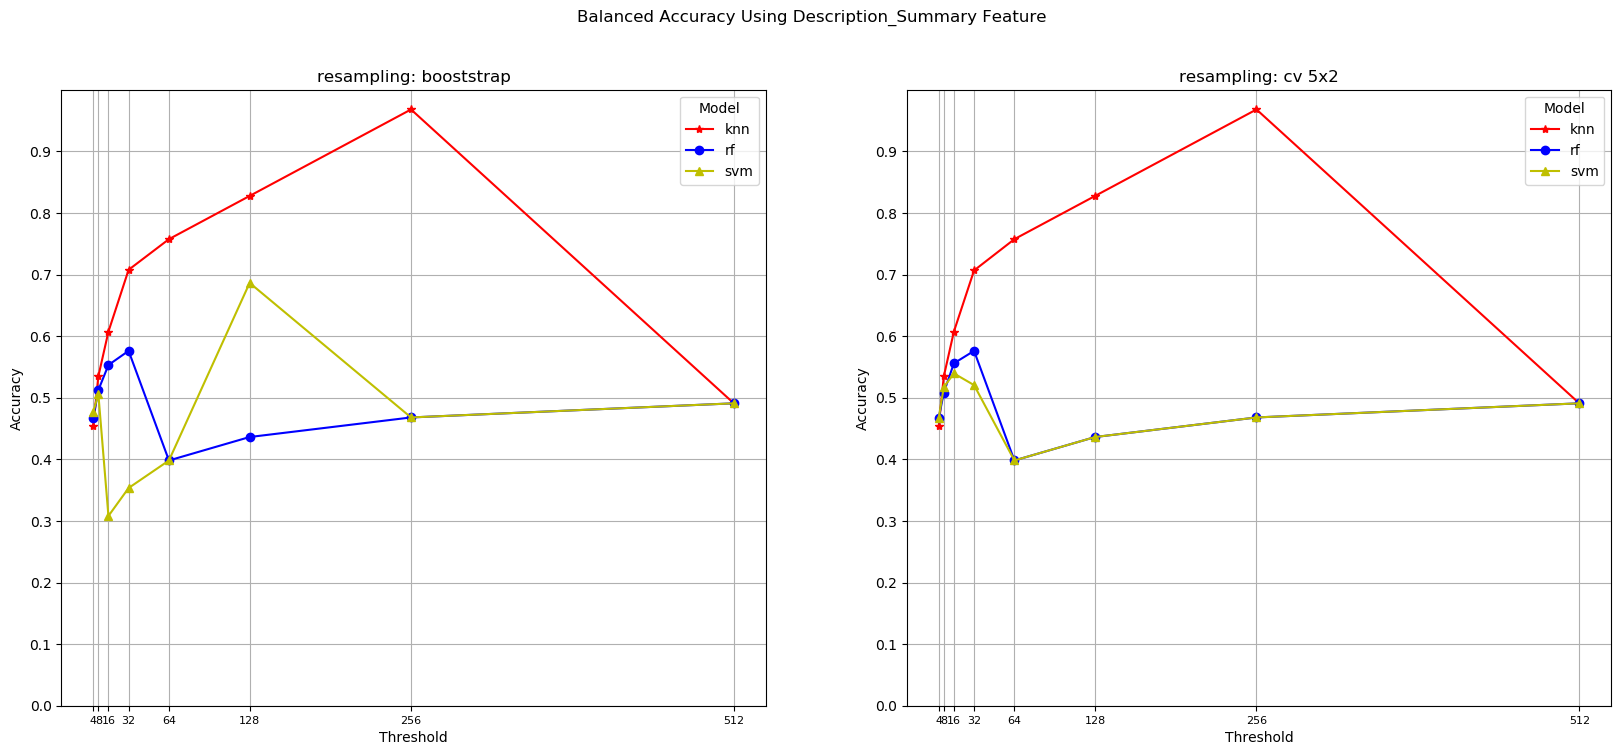

In [136]:
lineplot(results, 'Description_Summary')